In [ ]:
import pandas as pd
import numpy as np
import re
import string
import html
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DS = pd.read_csv('/content/drive/MyDrive/Datasets/Clean/DS.csv')

In [ ]:
SE = pd.read_csv('/content/drive/MyDrive/Datasets/Clean/SE.csv')

In [ ]:
AI = pd.read_csv('/content/drive/MyDrive/Datasets/Clean/AI.csv')

In [ ]:
MOBILE = pd.read_csv('/content/drive/MyDrive/Datasets/Clean/MOBILE.csv')

In [ ]:
CLOUD = pd.read_csv('/content/drive/MyDrive/Datasets/Clean/CLOUD.csv') 

In [ ]:
TWIN = pd.read_csv('/content/drive/MyDrive/Datasets/Clean/TWIN.csv')

In [ ]:
NIDS = pd.read_csv('/content/drive/MyDrive/Datasets/Clean/NIDS.csv')

In [ ]:
DS.shape

(151, 4)

In [ ]:
DS.sample(5)

,Name,Education,Experiences,Graduation_Year
140,Mohamed Ali Ben Slimane,Ecole Supérieure Privée d'Ingénierie et de Tec...,As an intern my mission is to ensure data qual...,2021
117,Oussama Mleiki,Ecole Supérieure Privée d'Ingénierie et de Tec...,Creating a machine learning AI to predict clie...,2022
62,Yasmine Hachicha,Ecole Supérieure Privée d'Ingénierie et de Tec...,Implement Amazon’s pathfinding algorithm for A...,2023
11,hamza yaakoubi,Ecole Supérieure Privée d'Ingénierie et de Tec...,Web application and Dashboard followed kpi dat...,2022
119,Med Salim Damergi,Ecole Supérieure Privée d'Ingénierie et de Tec...,Have a general idea about the Steg starting fr...,2020


## NLP Preprocessing

In [ ]:
# Download he necessary NLTK resources
nltk.download(['punkt', 'stopwords', 'wordnet'])
from nltk.corpus import stopwords

# Load spacy
nlp = spacy.load('en_core_web_sm')

def clean_string(text):
    
    # Replace HTML entity codes
    text = html.unescape(text)

    final_string = ""

    # Make lower
    text = text.lower()

    # Remove line breaks
    text = re.sub(r'\n', '', text)

    # # Remove puncuation
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    text = text.translate(translator)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stop words
    useless_words = stopwords.words("english")
    text_filtered = [token for token in tokens if not token in useless_words]

    # Remove non-alphabetic characters
    text_filtered = [re.sub(r'[^a-zA-Z.,\-]', '', w) for w in text_filtered]

    # Lemmatization
    lem = WordNetLemmatizer()
    # text_lemmed = [lem.lemmatize(y, pos='v') for y in text_filtered]
    text_lemmed = [lem.lemmatize(y) for y in text_filtered]

    # Re-join text
    final_string = ' '.join(text_filtered)

    return final_string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Create new dataframes with the cleaned and processed text
DS_data = pd.DataFrame(DS['Experiences'].apply(lambda x: clean_string(x)).tolist(), columns=['Experiences'])
# SE_data = pd.DataFrame(SE['Experiences'].apply(lambda x: clean_string(x)).tolist(), columns=['Experiences'])
# AI_data = pd.DataFrame(AI['Experiences'].apply(lambda x: clean_string(x)).tolist(), columns=['Experiences'])
# MOBILE_data = pd.DataFrame(MOBILE['Experiences'].apply(lambda x: clean_string(x)).tolist(), columns=['Experiences'])
# CLOUD_data = pd.DataFrame(CLOUD['Experiences'].apply(lambda x: clean_string(x)).tolist(), columns=['Experiences'])
# NIDS_data = pd.DataFrame(NIDS['Experiences'].apply(lambda x: clean_string(x)).tolist(), columns=['Experiences'])
# TWIN_data = pd.DataFrame(TWIN['Experiences'].apply(lambda x: clean_string(x)).tolist(), columns=['Experiences'])

In [ ]:
DS_data.sample(10)

,Experiences
126,implementation recommendation profile classifi...
82,skills network storage server nas virtualizati...
50,recommendation system automates process recrui...
101,take several courses deep learning machine lea...
80,modelisation implementation decision support s...
139,creation instance entity fields view businessr...
88,project consists implementing decision making ...
33,project consists developing web application au...
77,ocr web service detects classifies object extr...
44,edge computed energy disaggregation phone base...


## Visulalization

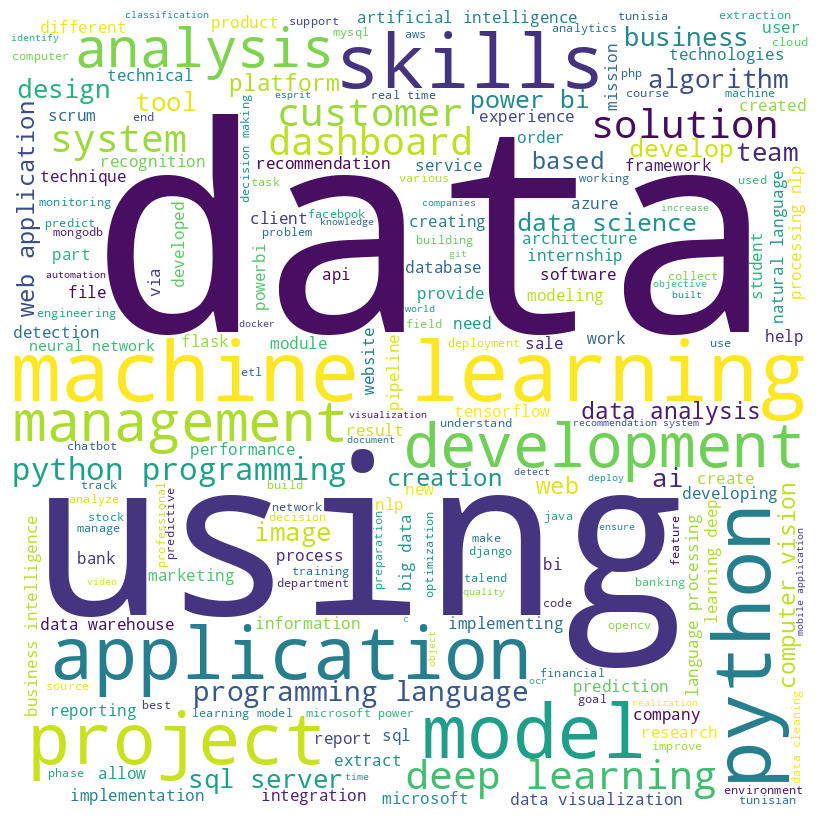

In [ ]:
# Concatenate all the cleaned text into a single string
text = ' '.join(DS_data['Experiences'].tolist())

# Create the wordcloud object
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(text)

# Display the wordcloud
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
def plot_top_ngrams_barchart(text, n):
    """
    Plots top n grams from text
    """
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:30]

    top_n_bigrams=_get_top_ngram(text,n)[:30]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,7))
    plt.title('Data Science')
    if n==2 :
      plt.xlabel("Bi-gram Frequency")
      plt.ylabel("Top 30 bi-grams")
    elif n==3 :
      plt.xlabel("Tri-gram Frequency")
      plt.ylabel("Top 30 Tri-grams")
    sns.barplot(x=y,y=x)

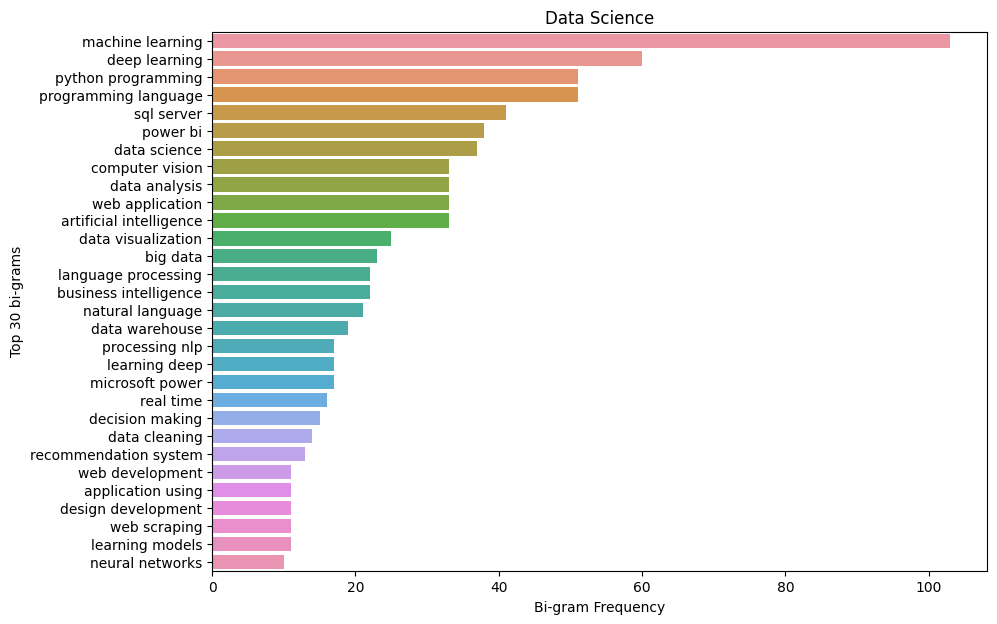

In [ ]:
plot_top_ngrams_barchart(DS_data['Experiences'],2)

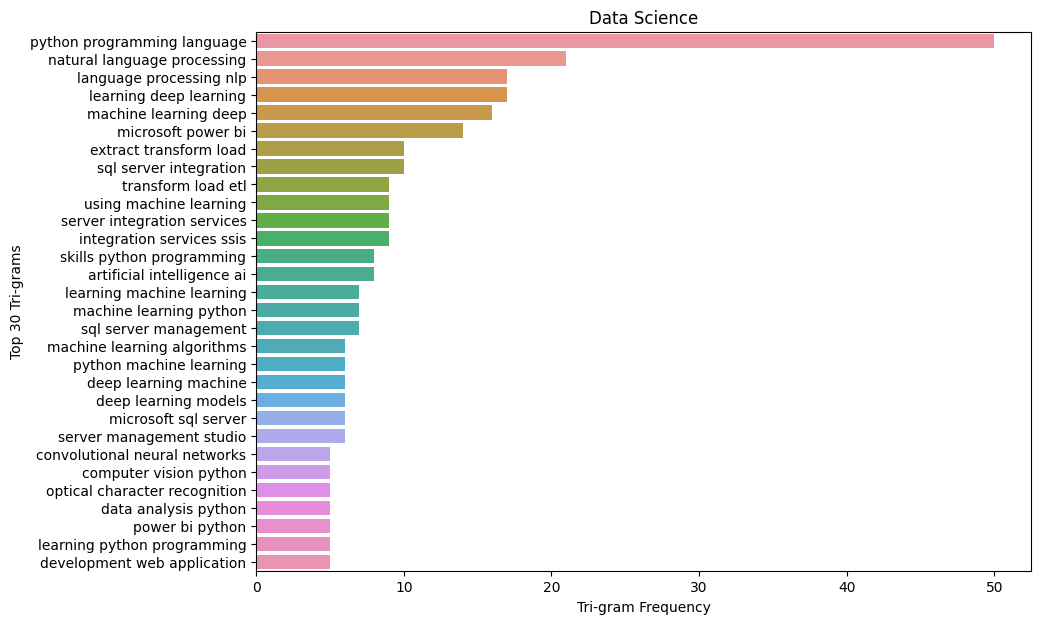

In [ ]:
plot_top_ngrams_barchart(DS_data['Experiences'],3)

## Extracting Keywords using KeyBERT

---



<img src="https://drive.google.com/uc?id=1Jxo9Wj-Y3i_dOA4k38A_Zs04IqTiyOep" width="80%">


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.8 MB/s eta 0:00:00
  Created wheel for keybert: filename=keybert-0.7.0-py3-none-any.whl size=23777 sha256=6d06ecc889ef4868a4157f5ab44eb6886f039dd2328719620a67b74854e2674b
  Stored in directory: /root/.cache/pip/wheels/66/8d/e6/b0e2f8d883b0fd51819226f67ad9843e04913ce4a97241ff4b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=e9aaee6e80eb3f1fa3d19af0771a2dd620915d14bce78c

In [ ]:
from keybert import KeyBERT

kw_model = KeyBERT()

# Define a function to extract keywords for each row
def extract_keywords(doc):
    """
    This function extracts the top 10 keywords from a given document using KeyBERT
    """
    keyphrases = kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 2), top_n=10)
    keywords = list(set([keyword for keyword, score in keyphrases]))
    # return ", ".join(keywords)
    return keywords

In [ ]:
def process_skills(df):
    skills = pd.DataFrame(df['Experiences'].apply(extract_keywords).tolist(), 
                          columns=['skill_1', 'skill_2', 'skill_3', 'skill_4', 'skill_5', 'skill_6', 
                                   'skill_7', 'skill_8', 'skill_9', 'skill_10'])
    return skills

In [ ]:
DS_skills = process_skills(DS_data)
# SE_skills = process_skills(SE_data)
# AI_skills = process_skills(AI_data)
# MOBILE_skills = process_skills(MOBILE_data)
# CLOUD_skills = process_skills(CLOUD_data)
# NIDS_skills = process_skills(NIDS_data)
# TWIN_skills = process_skills(TWIN_data)

In [ ]:
DS_skills.shape

(151, 10)

In [ ]:
DS_skills.sample(5)

,skill_1,skill_2,skill_3,skill_4,skill_5,skill_6,skill_7,skill_8,skill_9,skill_10
51,machine learning,product service,pharma medtech,algorithms health,predict business,categorizing data,automated information,clients pharma,medtech,learning extracted
49,communication infrastructure,systems project,intern deployment,rediscover embedded,infrastructure,iot devices,iot,lighting establishment,embedded systems,infrastructure iot
20,coaching software,project agile,educationuml software,python teaching,data science,agile,skills deep,software engineering,agile coaching,python agile
147,data warehouse,dashboards,dashboards report,analytics,organisation data,marketing data,bi data,google analytics,solutions dashboards,datalake
127,encountered applications,powerbi gitlab,harvested datatechnologies,information failure,datatechnologies ai,bug analysis,datatechnologies,bugs encountered,failure detectionrecommend,potential bugs


##Visualizing Extracted Keywords

In [ ]:
def plot_most_common_keywords(skills_data, specialization):
  # Combine all the skills columns into a single column
  skills = pd.concat([skills_data[f"skill_{i}"] for i in range(1, 11)], ignore_index=True)

  # Split the skills strings into individual keywords
  keywords = [keyword.strip() for skill in skills for keyword in skill.split(",")]

  # Count the frequency of each keyword
  keyword_counts = pd.Series(keywords).value_counts().sort_values(ascending=False)

  # Create a bar chart of the most frequent keywords
  plt.figure(figsize=(10,6))
  keyword_counts[:30].plot(kind="barh")
  plt.title(f"Most Common Keywords - {specialization}")
  plt.xlabel("Frequency")
  plt.ylabel("Keyword")
  plt.show()

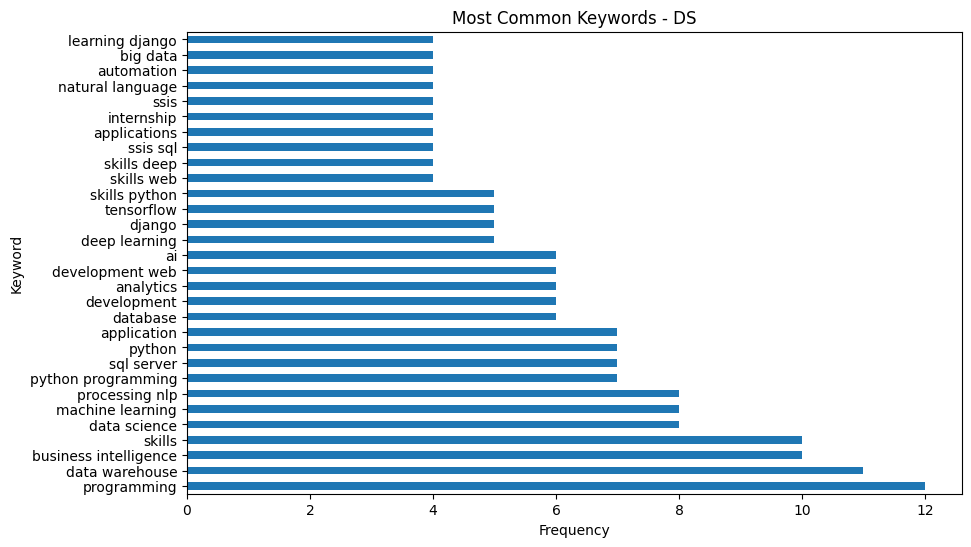

In [ ]:
plot_most_common_keywords(DS_skills, "DS")
# plot_most_common_keywords(SE_skills, "SE")
# plot_most_common_keywords(AI_skills, "AI")
# plot_most_common_keywords(MOBILE_skills, "MOBILE")
# plot_most_common_keywords(CLOUD_skills, "CLOUD")
# plot_most_common_keywords(NIDS_skills, "NIDS")
# plot_most_common_keywords(TWIN_skills, "TWIN")

# IT tools and technologies database
A comprehensive database of IT skills and technologies required for various occupations. It includes a wide range of skills such as programming languages, software applications, operating systems, and more. In this project, we will be using this database to help clean the extracted keywords by matching them with the skills listed in the database. This will help us ensure that the skills we extracted are relevant.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/technologies.csv')

DS_curriculum = pd.read_excel('/content/drive/MyDrive/Datasets/Fiche-DS.xlsx')

# Convert the csv file into a dataframe
techs_df = pd.DataFrame(df).fillna('')

In [ ]:
techs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Web Development   182 non-null    object
 1   Big Data          182 non-null    object
 2   Machine Learning  182 non-null    object
 3   Deep Learning     182 non-null    object
 4   Security          182 non-null    object
dtypes: object(5)
memory usage: 7.2+ KB


In [ ]:
DS_curriculum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Web Development   23 non-null     object
 1   Big Data          18 non-null     object
 2   Machine Learning  13 non-null     object
 3   Deep Learning     12 non-null     object
 4   Security          9 non-null      object
dtypes: object(5)
memory usage: 1.0+ KB


In [ ]:
techs_df.sample(10)

,Web Development,Big Data,Machine Learning,Deep Learning,Security
27,Express,Jupyter,AllenNLP,BigDL,2FA
88,Git,,Torch,PyTorch GPUs,SAP
103,Laravel Mix,,TensorFlow Serving,,Mobile Device Management
54,XML APIs,Data Governance,Unity ML-Agents,IBM Watson Visual Recognition,SIEM
156,Grunt,,,,Security Compliance
89,Docker,,CNTK,ONNX Runtime,Two-factor authentication
118,Vuex,,Microsoft Cognitive Toolkit,,Network Segmentation
155,Gulp,,,,Security Audit
124,Vuex mutations,,,,Data Encryption at Rest
161,Bootstrap 5,,,,Security Risk Management


# Fuzzy matching
Fuzzy matching is a technique used to match strings that are not exactly the same but are similar. In our case, we will use it to match the extracted skills with the skills in the IT dataset. We will use it to calculate the similarity score between the two strings and consider a match if the score is above a certain threshold. This will help us identify skills that are spelled or written differently but refer to the same concept.

In [ ]:
!pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the fuzzywuzzy library
from fuzzywuzzy import fuzz

# Define a function to match skills using fuzzy matching and exact matching
def match_skill(skill, skill_list):
    '''
      Matches a skill in skill_list using Fuzzy Matching
    '''
    # Loop through each skill in the IT Skills dataset
    for tech in skill_list:
        # Calculate the similarity score between the two skills using fuzzy matching
        score = fuzz.ratio(skill.lower(), tech.lower())
        # If the similarity score is above a certain threshold, return the matching skill
        if score >= 60:
            return tech

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
def filter_skills(skills, techs_df):
   
    def match_category(skill):
      '''
        Returns all categories that match 'skill'
      '''
      matches = []

      for category in techs_df.columns:
          exact_match = techs_df[category].str.lower().str.contains(skill.lower()).any()
          if exact_match:
              matches.append(category)
          else:
              for tech in techs_df:
                  score = fuzz.ratio(skill.lower(), tech.lower())
                  if score >= 50:
                      matches.append(category)
      return matches

    # Create an empty dictionary to store the matched skills
    matched_skills = {category: [] for category in techs_df.columns}

    # Apply the match_category function to each skill in the skills dataset
    for col in skills.columns:
        for skill in skills[col].dropna().unique():
            categories = match_category(skill)
            if categories:
                for category in categories:
                    matched_skill = match_skill(skill, techs_df[category].dropna().unique())
                    if matched_skill:
                        matched_skills[category].append(matched_skill)

    # Define a function to remove duplicates in a list and return the result
    def remove_duplicates(x):
        if isinstance(x, list):
            return list(set(x))
        else:
            return x

    # Apply the remove_duplicates function to each column in the matched_skills dictionary
    for category in matched_skills:
        matched_skills[category] = remove_duplicates(matched_skills[category])

    # Append None to shorter lists to ensure they are of the same length
    max_length = max([len(x) for x in matched_skills.values()])
    for category in matched_skills:
        matched_skills[category] += [None] * (max_length - len(matched_skills[category]))

    # Convert the matched_skills dictionary to a sorted pandas dataframe
    matched_skills_df = pd.DataFrame.from_dict(matched_skills).apply(lambda x: x.sort_values().reset_index(drop=True), axis=0).fillna('')
    
    return matched_skills_df

In [ ]:
DS_filtered_skills = filter_skills(DS_skills, techs_df)

In [ ]:
DS_filtered_skills.shape

(29, 5)

In [ ]:
DS_filtered_skills

,Web Development,Big Data,Machine Learning,Deep Learning,Security
0,AWS (Amazon Web Services),Bigtable,Amazon Machine Learning,Amazon Machine Learning,Access Control
1,Ansible,Cloudera,Apache Mahout,BigDL,Anti-Malware
2,Apache,Data Governance,BigDL,CNNs,CA
3,Azure,Data Security,CatBoost,CatBoost,Cloud Sec
4,Bootstrap,Data lakes,DataRobot,Chainer,Compliance Monitoring
5,Bulma,Data mining,Databricks,Data Augmentation,Data Backup
6,Django,Data warehousing,Dataiku,Dataiku,Data Classification
7,ESLint,Elasticsearch,Deep Learning Toolkit,Deeplearning4j,Data Loss Prevention
8,GCP (Google Cloud Platform),Google Cloud Dataproc,DeepMind Lab,Dopamine,Data Security
9,Laravel,HBase,Deeplearning4j,Google AutoML,IoT Sec


##Matching filtered data with school curriculum

In [ ]:
# Find the skills in DS_filtered_skills that don't exist in DS_curriculum
missing_skills = DS_filtered_skills[~DS_filtered_skills.isin(DS_curriculum)].dropna(how='all')

# Use fuzzy matching to find similar skills between the two dataframes
for col in missing_skills.columns:
    for i, skill in missing_skills[col].dropna().items():
        for j, curriculum_skill in DS_curriculum[col].dropna().items():
            # Compare the two skills using fuzzy matching
            ratio = fuzz.ratio(skill.lower(), curriculum_skill.lower())
            if ratio >= 70:
                # If the ratio is high enough, assume the two skills are the same
                missing_skills.loc[i, col] = ''
                break

# Rearrange the missing skills dataframe to match the original structure
missing_skills = missing_skills.reindex(columns=DS_filtered_skills.columns)

# Replace any NaN values with an empty string
missing_skills = missing_skills.fillna('')

# missing_skills.to_csv('/content/drive/MyDrive/Datasets/missing_skills.csv', index=False)

missing_skills = pd.DataFrame({
    col: sorted(missing_skills[col], reverse=True)
    for col in missing_skills.columns
})

missing_skills.replace('', np.nan, inplace=True)

missing_skills.dropna(how='all', inplace=True)

missing_skills = missing_skills.fillna('')

# Print the resulting dataframes
print("Skills missing in curriculum:")
missing_skills

Skills missing in curriculum:


,Web Development,Big Data,Machine Learning,Deep Learning,Security
0,XML APIs,Tableau,XGBoost,XGBoost,Web Application Firewall
1,Webpack,Pyspark,TensorFlow,Tableau,TrueCrypt
2,Web Components,Presto,Tableau,Regularization,TLS
3,Vuex Store,Predictive Analytics,Stable Baselines,Pyspark,Social Engineering
4,Vuex State Management,Power BI,SAS Analytics,Power BI,Security Training
5,Symfony,NoSQL,RapidMiner,Microsoft Azure Computer Vision,Security Policy Development
6,SQL Server,MongoDB,R,IBM Watson,Security Onion
7,SOAP APIs,HBase,PyTorch,Google AutoML,Security Consulting
8,React State,Google Cloud Dataproc,Power BI,Dopamine,Security Awareness Training
9,React,Data warehousing,OpenCV,Deeplearning4j,Security Architecture


In [ ]:
# Use fuzzy matching to find similar skills between the two dataframes
common_skills = pd.DataFrame(columns=DS_filtered_skills.columns)
for col in DS_filtered_skills.columns:
    for i, skill in DS_filtered_skills[col].dropna().items():
        for j, curriculum_skill in DS_curriculum[col].dropna().items():
            # Compare the two skills using fuzzy matching
            ratio = fuzz.ratio(skill.lower(), curriculum_skill.lower())
            if ratio >= 70:
                # If the ratio is high enough, assume the two skills are the same
                common_skills.loc[i, col] = skill
                break

common_skills = common_skills.fillna('')
# common_skills.to_csv('/content/drive/MyDrive/Datasets/common_skills.csv', index=False)


common_skills = pd.DataFrame({
    col: sorted(common_skills[col], key=lambda x: (pd.isna(x), x),reverse=True)
    for col in common_skills.columns
})
common_skills.replace('', np.nan, inplace=True)

common_skills.dropna(how='all', inplace=True)

common_skills = common_skills.fillna('')


# Print the resulting dataframes
print("Common skills:")
common_skills

Common skills:


,Web Development,Big Data,Machine Learning,Deep Learning,Security
0,Spring,Spark Streaming,,TensorFlow,
1,MySQL,Python,,RNNs,
2,,Hadoop,,Python,
3,,Elasticsearch,,Keras,
4,,Cloudera,,CNNs,


##Results Analysis

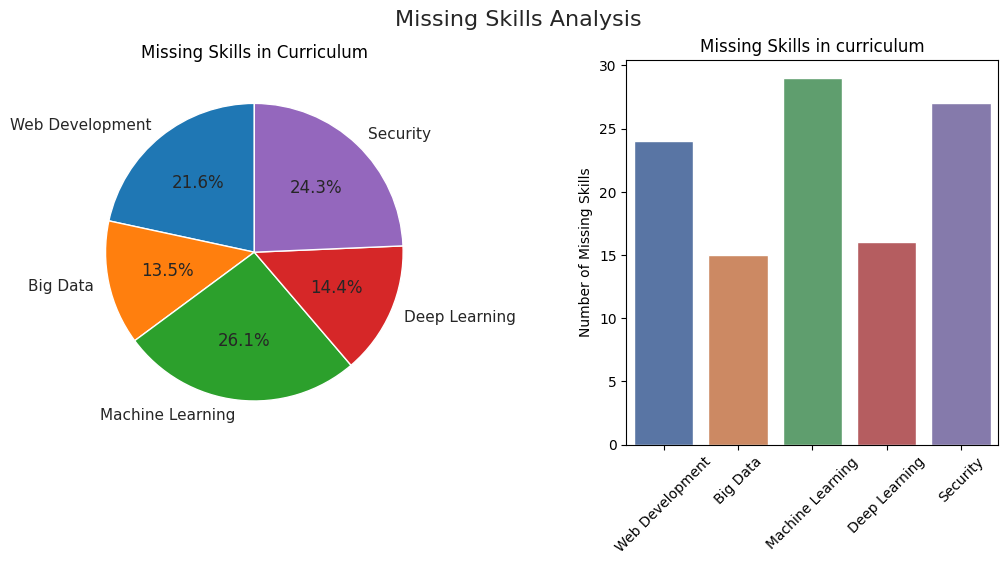

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and create two subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Count the number of missing skills per category
missing_counts = missing_skills.astype(bool).sum(axis=0)

# Create a pie chart of the missing skill counts using Seaborn
sns.set_palette("Set2")
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
ax1.pie(missing_counts.values, labels=missing_counts.index, autopct='%1.1f%%', startangle=90)

# Set the chart title
ax1.set_title('Missing Skills in Curriculum')

# Count the number of missing skills per category
missing_counts = missing_skills.astype(bool).sum(axis=0)

# Create a bar chart of the missing skill counts using Seaborn
sns.barplot(x=missing_counts.index, y=missing_counts.values, ax=ax2)

# Set the chart title and axis labels
ax2.set_title('Missing Skills in curriculum')
ax2.set_ylabel('Number of Missing Skills')

# Rotate the category labels for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

fig.suptitle('Missing Skills Analysis', fontsize=16)

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5)

# Display the chart
plt.show()

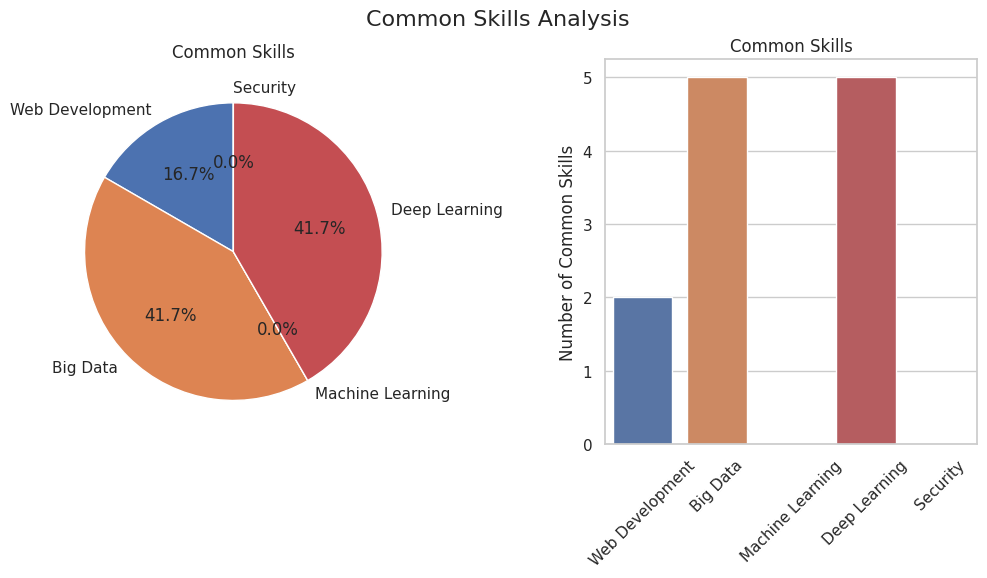

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size and create two subplots side by side
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Count the number of Common Skills per category
common_counts = common_skills.astype(bool).sum(axis=0)

# Create a pie chart of the missing skill counts using Seaborn
sns.set_palette("Set2")
sns.set(font_scale=1.0)
sns.set_style("whitegrid")
ax1.pie(common_counts.values, labels=common_counts.index, autopct='%1.1f%%', startangle=90)

# Set the chart title
ax1.set_title('Common Skills')

# Count the number of Common Skills per category
common_counts = common_skills.astype(bool).sum(axis=0)

# Create a bar chart of the missing skill counts using Seaborn
sns.barplot(x=common_counts.index, y=common_counts.values, ax=ax2)

# Set the chart title and axis labels
ax2.set_title('Common Skills')
ax2.set_ylabel('Number of Common Skills')

# Rotate the category labels for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

fig.suptitle('Common Skills Analysis', fontsize=16)

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5)

# Display the chart
plt.show()